Universidad Galileo  
Maestría en Data Science  
Ciencia de datos en Python  
Sección U  


   # **PROYECTO DEL CURSO**


<p style="text-align: right;">
Henry Giovanni<br/>
Barrientos García<br/>
21001538<br/>
Guatemala, 07 de abril de 2021<br/>
</p>

# PROYECTO DEL CURSO

### Usando sclicing con NumPy separar los datos en 2 datasets:
* entrenamiento (80%)
* validación y pruebas (20%) 

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

all_data = np.load('proyecto_data\proyecto_training_data.npy')
# twenty_percent = int(.20 * len(all_data))
# test_data = all_data[slice(twenty_percent)]
# train_data = all_data[slice(twenty_percent, len(all_data))]
eighty_percent = int(.80 * len(all_data))
train_data = all_data[slice(eighty_percent)]
test_data = all_data[slice(eighty_percent, len(all_data))]

### Análisis exploratorio de datos.
Para cada variable en el dataset calcular:
* Media
* Valor máximo
* Valor mínimo 
* Rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
* Desviación estándar 


In [2]:
print ("MEDIA:\n", np.nanmean(train_data, axis = 0) ) #train_data.mean(axis = 0) )
max_arr = np.nanmax(train_data, axis = 0)
print ("MÁXIMO:\n", max_arr )
min_arr = np.nanmin(train_data, axis = 0)
print ("MÍNIMO:\n", min_arr )
print ("RANGO:\n", (max_arr - min_arr) )
print ("DESVIACIÓN ESTÁNDAR:\n", np.nanstd(train_data, axis = 0) )

MEDIA:
 [1.80590277e+05 6.10102740e+00 1.15632363e+03 6.48544521e+00
 1.97145120e+03 6.99469854e+01]
MÁXIMO:
 [7.550e+05 1.000e+01 3.228e+03 1.400e+01 2.010e+03 3.130e+02]
MÍNIMO:
 [3.490e+04 1.000e+00 3.340e+02 2.000e+00 1.875e+03 2.100e+01]
RANGO:
 [7.201e+05 9.000e+00 2.894e+03 1.200e+01 1.350e+02 2.920e+02]
DESVIACIÓN ESTÁNDAR:
 [7.87819511e+04 1.37743519e+00 3.73620332e+02 1.60845172e+00
 2.99388821e+01 2.34659548e+01]


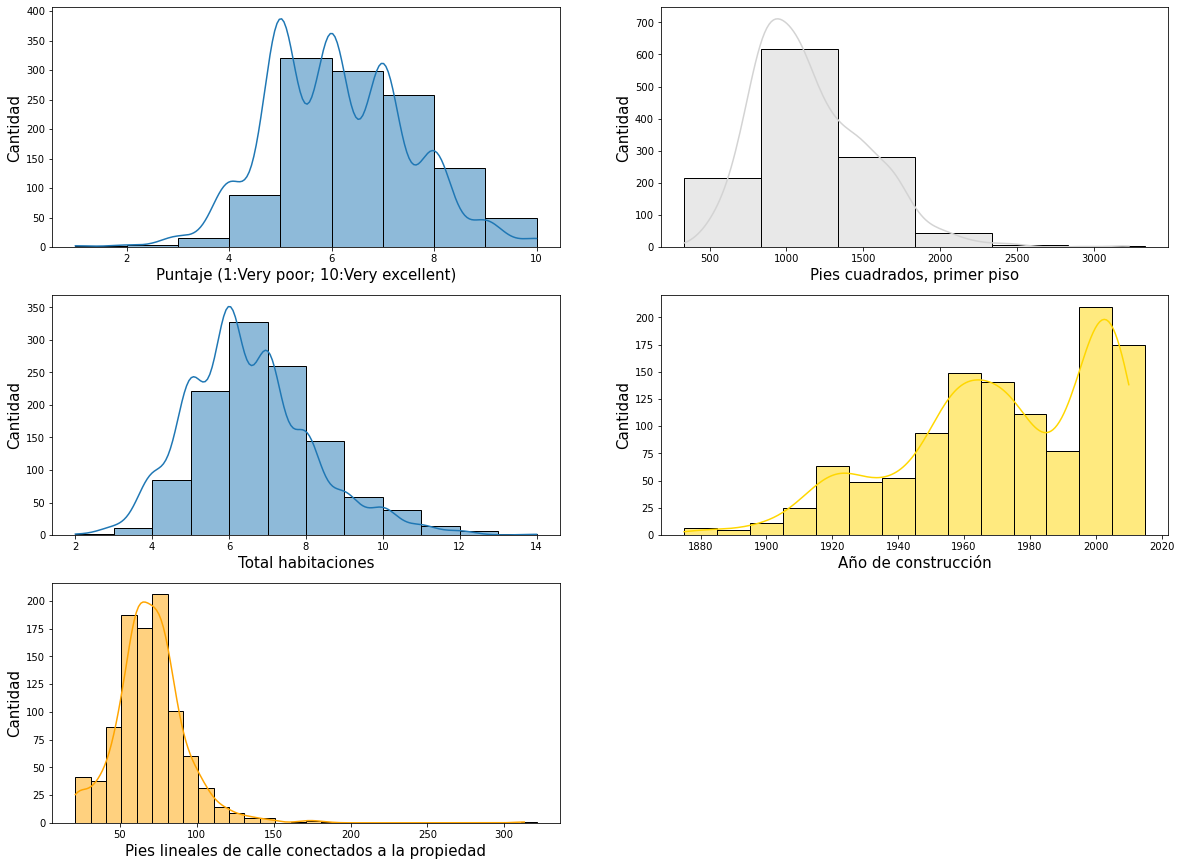

In [3]:
class HistChart():
    def __init__(self, column_name, binwidth, color, xlabel, ylabel = "Cantidad"):
        self.column_name = column_name
        self.binwidth = binwidth
        self.color = color
        self.xlabel = xlabel
        self.ylabel = ylabel

charts = [
    # HistChart("SalePrice", 30000, "yellowgreen", "Precio de venta USD"),
    HistChart("OverallQual", 1, None, "Puntaje (1:Very poor; 10:Very excellent)"),
    HistChart("1stFlrSF", 500, "lightgrey", "Pies cuadrados, primer piso"),
    HistChart("TotRmsAbvGrd", 1, None, "Total habitaciones"),
    HistChart("YearBuilt", 10, "gold", "Año de construcción"),
    HistChart("LotFrontage", 10, "orange", "Pies lineales de calle conectados a la propiedad")
]
dtframe = pd.DataFrame(train_data, columns=["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"])
fig  = plt.figure(figsize = (20, 15))
for index, chart in enumerate(charts):
    hplot = fig.add_subplot(3, 2, index+1)
    hplot = sns.histplot(data = dtframe, x = chart.column_name, binwidth = chart.binwidth, color = chart.color, kde = True)
    hplot.set_xlabel(chart.xlabel, fontsize = 15);
    hplot.set_ylabel (chart.ylabel, fontsize = 15);

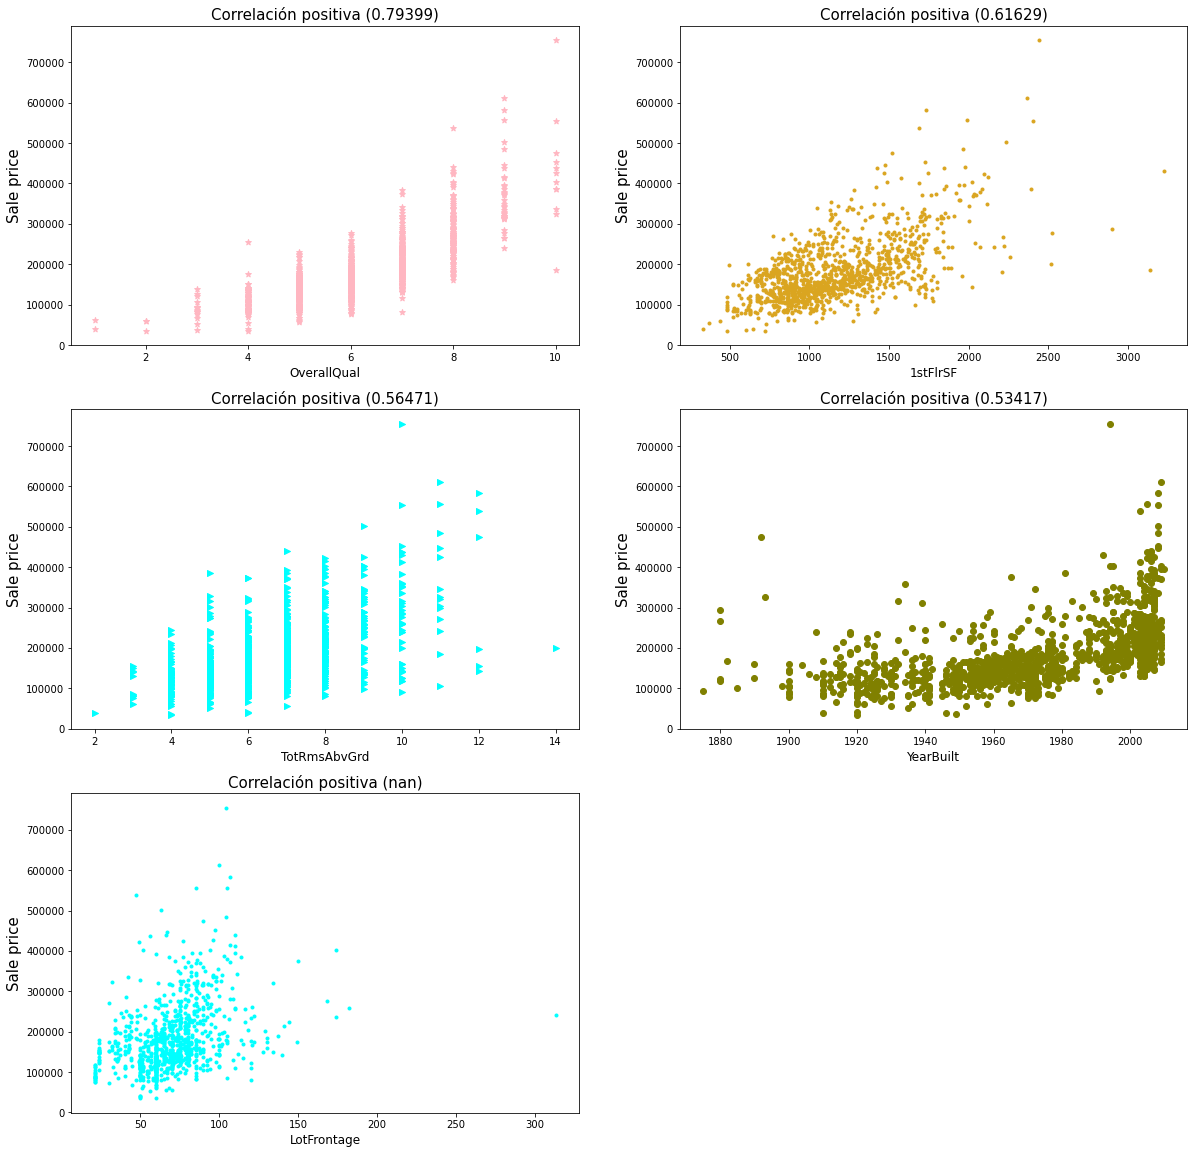

In [4]:
fig  = plt.figure(figsize = (20, 20))
marc = ["*", ">", "<", "o", "v", ".", "+", "8", "x", "^"]
kolor = ["peru", "olive", "aqua", "palegreen", "dodgerblue", "crimson", "lightpink", "goldenrod", "gainsboro", "coral"]
for index in range(dtframe.shape[1]):   # iterar columnas
    if (index > 0):   # solo las variables independientes
        y_vals = dtframe.iloc[: , 0].values
        x_vals = dtframe.iloc[: , index].values
        corrcoef = np.corrcoef(x_vals, y_vals)[0, 1]
        scarer = fig.add_subplot(3, 2, index) 
        scarer.scatter(x_vals, y_vals, marker = marc[np.random.randint(10)], color = kolor[np.random.randint(10)])  
        title = "No existe correlación"
        if (corrcoef != 0):
            title = "Correlación {} ({:.5})".format( ("negativa" if (corrcoef < 0) else "positiva"), corrcoef )
        scarer.set_title(title, fontsize = 15)
        scarer.set_xlabel(dtframe.columns[index], fontsize = 12)
        scarer.set_ylabel("Sale price", fontsize = 15)


## VARIABLES CON MÁS POTENCIAL PREDICTIVO
BasadoS en la gráfica y el coeficiente de correlación de cada par (x, y) es observable que las 2 variables con más potencial predictivo son:
1. OverallQual
2. 1stFlrSF

VARIABLE: OverallQual; ITERACIÓN: 0101; ERROR PROMEDIO: 9464438920.851486
VARIABLE: OverallQual; ITERACIÓN: 0351; ERROR PROMEDIO: 2477766717.0858254
VARIABLE: OverallQual; ITERACIÓN: 0601; ERROR PROMEDIO: 1538924766.642562
VARIABLE: OverallQual; ITERACIÓN: 0851; ERROR PROMEDIO: 1412330453.9072847
VARIABLE: OverallQual; ITERACIÓN: 1101; ERROR PROMEDIO: 1394825258.779842
VARIABLE: OverallQual; ITERACIÓN: 1351; ERROR PROMEDIO: 1391972333.7373197
VARIABLE: OverallQual; ITERACIÓN: 1601; ERROR PROMEDIO: 1391088450.7069576
VARIABLE: OverallQual; ITERACIÓN: 1851; ERROR PROMEDIO: 1390470201.4545224
VARIABLE: 1stFlrSF; ITERACIÓN: 0010; ERROR PROMEDIO: 1.7203222959185417e+49
VARIABLE: 1stFlrSF; ITERACIÓN: 0020; ERROR PROMEDIO: 3.65007501097483e+92
VARIABLE: 1stFlrSF; ITERACIÓN: 0030; ERROR PROMEDIO: 7.744506722578399e+135
VARIABLE: 1stFlrSF; ITERACIÓN: 0040; ERROR PROMEDIO: 1.6431822413437093e+179
VARIABLE: 1stFlrSF; ITERACIÓN: 0050; ERROR PROMEDIO: 3.4864039440957564e+222
VARIABLE: 1stFlrSF; ITE

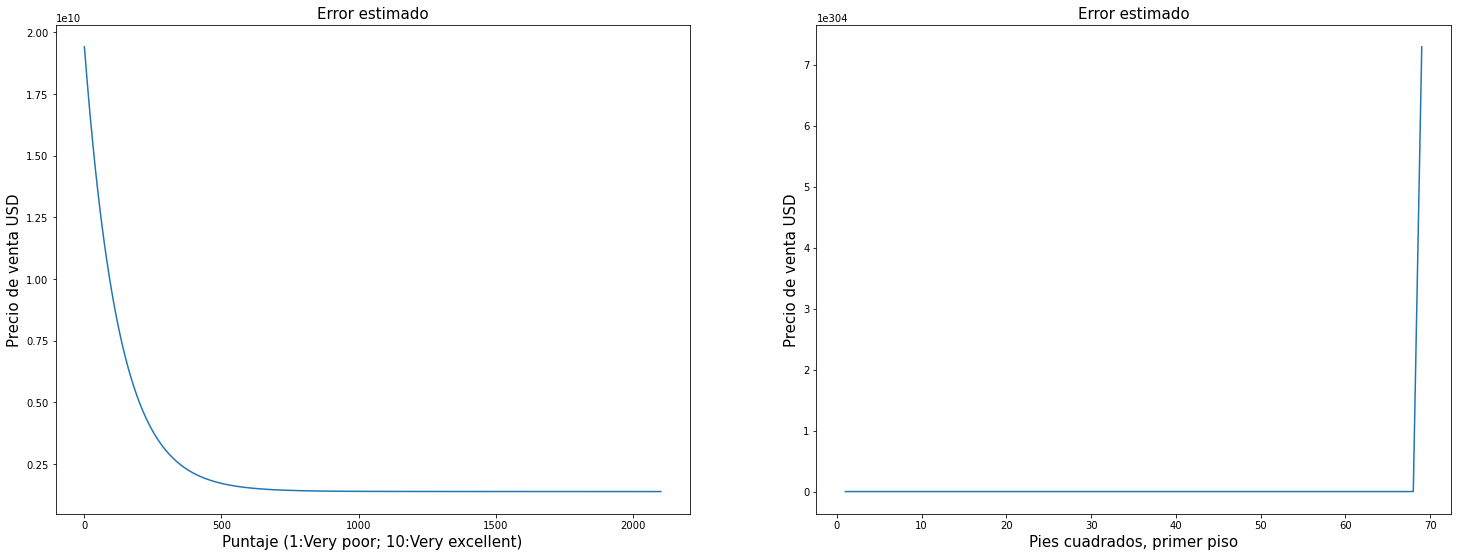

In [5]:
def do_graph(x_data, y_data, xlabel, ylabel, title, fig, plot_index):
    """
    Esta función permite visualizar, con matplotlib, como cambia el error en el tiempo.
    x_data: numpy array, conjunto de valores para el eje x
    y_data: numpy array, conjunto de valores para el eje x
    xlabel: str, titulo para el eje x
    ylabel: str, titulo para el eje y
    title:  str, titulo para la grafica
    fig:    figure, objeto canvas para ubicar en un grid las graficas
    plot_index: int, indice con el que será referenciada la gráfica
    """
#     print(x_data, "\n", y_data)
    xyplot = fig.add_subplot(1, 2, plot_index)
    xyplot.plot(x_data, y_data)
    xyplot.set_title(title, fontsize = 15)
    xyplot.set_xlabel(xlabel, fontsize = 15)
    xyplot.set_ylabel(ylabel, fontsize = 15)

    
def do_training(x_vals, y_vals, epochs, imprimir_error_cada, learning_rate, result, column_name, iteration = 1, mb = [0, 0]):
    """
    """
    m = mb[0]
    b = mb[1]
    x_vals_one = np.c_[x_vals, np.ones(x_vals.shape[0])]
    yhat = np.add( np.multiply(m, x_vals), b)
    error_arr = np.divide( np.power( np.subtract(yhat, y_vals), 2), 2)
    error_mean = np.mean(error_arr)

    mb_grad = np.multiply(np.c_[np.subtract(yhat, y_vals), np.subtract(yhat, y_vals)], x_vals_one)
    # estimar nueva m y b
    m_mean = np.mean(mb_grad, axis = 0)[0]
    b_mean = np.mean(mb_grad, axis = 0)[1]
    m = np.subtract(m, np.multiply(learning_rate, m_mean) )
    b = np.subtract(b, np.multiply(learning_rate, b_mean) )
    if ((epochs%imprimir_error_cada) == 0 ):
        print("VARIABLE: {}; ITERACIÓN: {:0>4}; ERROR PROMEDIO: {}".format(column_name, iteration, error_mean))
    epochs -= 1
    result = np.r_[result, [[iteration, m, b, error_mean]] ]
    if (epochs > 0):
        iteration += 1
        result = do_training(x_vals, y_vals, epochs, imprimir_error_cada, learning_rate, result, column_name, iteration, [m, b])
    return result

# result = do_training(np.array([65,80,68]), np.array([208.5, 181.5, 223.5]), 10, 1, 0.0001, np.empty([0, 4]))
# do_graph(result[:,0], result[:,3])
# print(result)
# break

fig = plt.figure(figsize = (25, 9))
plot_index = 0
training_results = {}
for column_name in dtframe:
    if (column_name == "OverallQual"):
        result = do_training(dtframe[column_name].values, dtframe["SalePrice"].values, 2100, 250, 0.0001, np.empty([0, 4]), column_name)
        plot_index += 1
        do_graph(result[:,0], result[:,3], "Puntaje (1:Very poor; 10:Very excellent)", "Precio de venta USD", "Error estimado", fig, plot_index)
        training_results["OverallQual"] = result
    elif (column_name == "1stFlrSF"):
        result = do_training(dtframe[column_name].values, dtframe["SalePrice"].values, 69, 10, 0.0001, np.empty([0, 4]), column_name)
        plot_index += 1
        do_graph(result[:,0], result[:,3], "Pies cuadrados, primer piso", "Precio de venta USD", "Error estimado", fig, plot_index)
        training_results["1stFlrSF"] = result




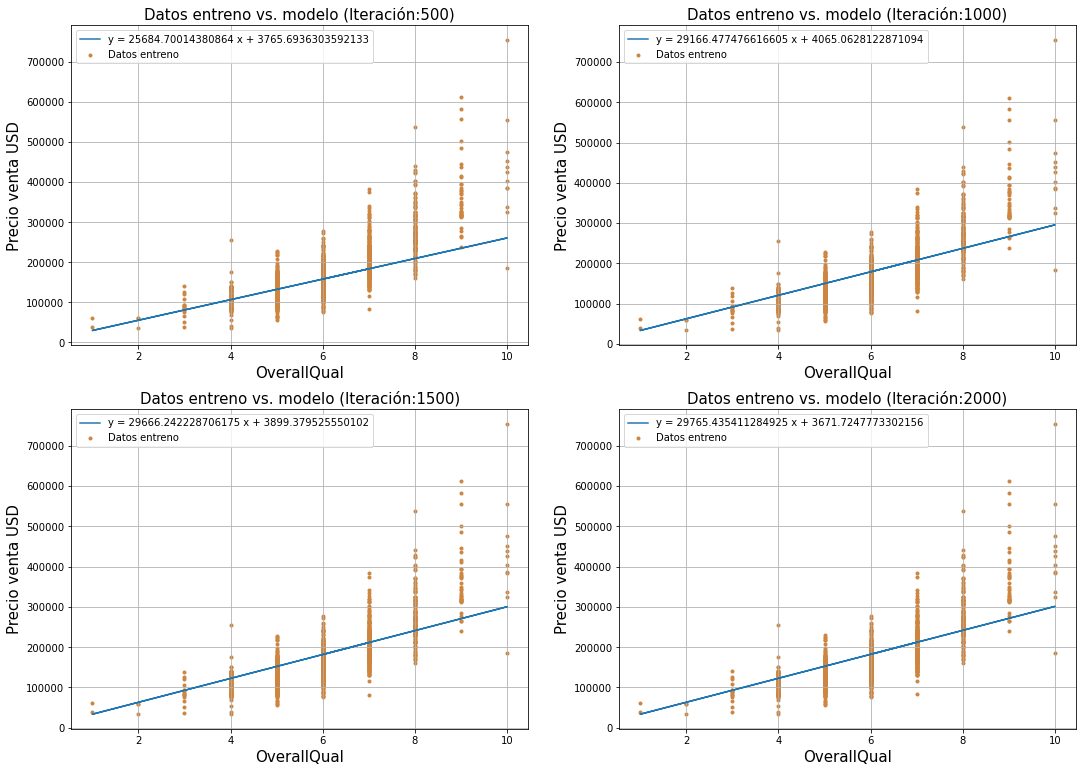

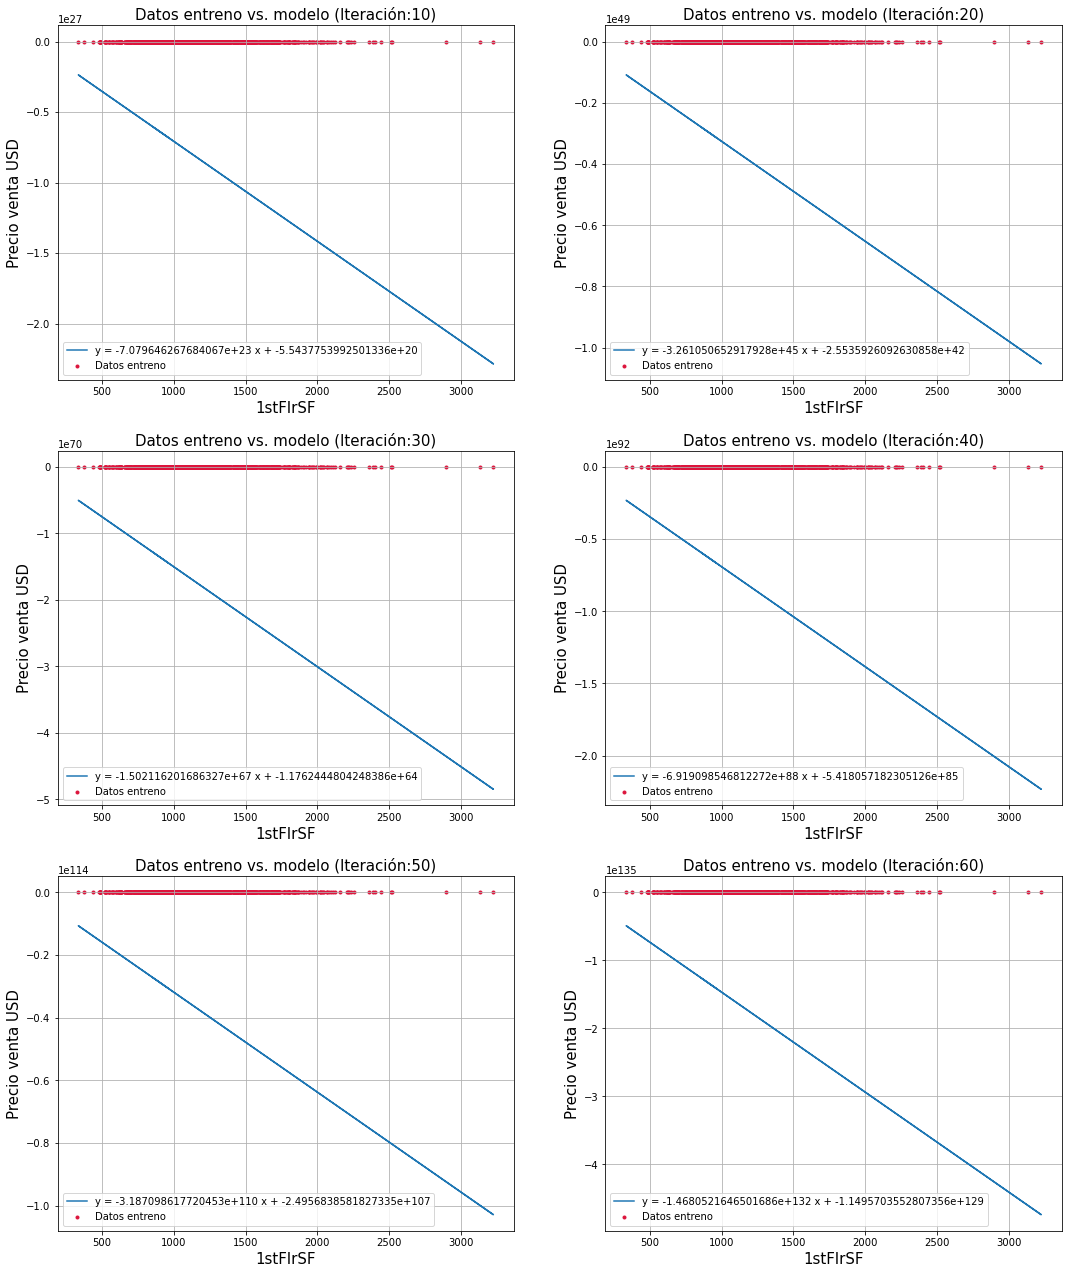

In [6]:
def do_graph_line_scatter(x_values, y_values, stimated_data, grap_every, varx_name):
    plot_index = 1
    num_charts = int( stimated_data.shape[0] / grap_every )
    # row in canvas should be dynamic. (2 columns in graph canvas)
    canvas_rows = 1 + int(num_charts / 2)
    fig = plt.figure(figsize = (18, int(5*num_charts) ))
    scatter_color = kolor[np.random.randint(10)]
    for n in range(grap_every, stimated_data.shape[0]+1, grap_every):
        m = stimated_data[n-1, 1]
        b = stimated_data[n-1, 2]
        xyplot = fig.add_subplot(canvas_rows, 2, plot_index)
        xyplot.plot(x_values, np.add( np.multiply(m, x_values), b), label = 'y = {} x + {}'.format(m, b) )
        xyplot.scatter(x_values, y_values, marker = ".", color = scatter_color, label = 'Datos entreno')
        xyplot.set_title("Datos entreno vs. modelo (Iteración:{})".format(n), fontsize = 15)
        xyplot.set_xlabel(varx_name, fontsize = 15)
        xyplot.set_ylabel("Precio venta USD", fontsize = 15)
        xyplot.legend()
        xyplot.grid(True)
        plot_index += 1


grap_index = 0
for column_name in training_results:
    if (column_name == "OverallQual"):
        do_graph_line_scatter(dtframe[column_name].values, dtframe["SalePrice"].values, training_results[column_name], 500, column_name)
    elif (column_name == "1stFlrSF"):
        do_graph_line_scatter(dtframe[column_name].values, dtframe["SalePrice"].values, training_results[column_name], 10, column_name)
        


### Entrenar modelo de regresión lineal con Scikit-learn
Para cada una de las variables x seleccionadas, usar scikit-learn para entrenar un modelo de regresión lineal

In [8]:
from sklearn.linear_model import LinearRegression

def get_linearregression_OverallQual():
    somethingtodo = None


def get_linearregression_1stFlrSF():
    somethingtodo = None


lr_model = LinearRegression()
lr_model.fit( np.reshape(dtframe["OverallQual"].values, (-1, 1)), 
             np.reshape(dtframe["SalePrice"].values, (-1, 1)) )
print(lr_model.coef_)
print(lr_model.intercept_)

lr_sqft_model = LinearRegression()
lr_sqft_model.fit( np.reshape(dtframe["1stFlrSF"].values, (-1, 1)), 
                 np.reshape(dtframe["SalePrice"].values, (-1, 1)) )
print(lr_sqft_model)

dttest_frame = pd.DataFrame(test_data, columns=["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"])
predictions = lr_model.predict( np.reshape(dttest_frame["1stFlrSF"].values, (-1, 1)) )
print(predictions)


[[45411.99877916]]
[-96469.57131874]
LinearRegression()
[[5.60327609e+07]
 [8.30529002e+07]
 [5.06741451e+07]
 [5.71680609e+07]
 [2.82860297e+07]
 [7.41975604e+07]
 [5.30355690e+07]
 [9.65856758e+07]
 [4.18188053e+07]
 [3.70505454e+07]
 [3.71413694e+07]
 [5.09466171e+07]
 [5.88483048e+07]
 [7.49241524e+07]
 [1.09391859e+08]
 [5.12190890e+07]
 [7.12911925e+07]
 [4.29995173e+07]
 [4.59512972e+07]
 [7.36526164e+07]
 [3.76409014e+07]
 [4.65870652e+07]
 [7.35617924e+07]
 [3.45982975e+07]
 [3.81404334e+07]
 [5.54878169e+07]
 [3.00116856e+07]
 [3.29634655e+07]
 [3.98206774e+07]
 [3.69143094e+07]
 [5.49428729e+07]
 [6.26629127e+07]
 [3.91394974e+07]
 [3.92303214e+07]
 [4.00477373e+07]
 [7.39250884e+07]
 [4.86760171e+07]
 [9.96282797e+07]
 [4.78586011e+07]
 [7.71039284e+07]
 [5.81671249e+07]
 [7.52874484e+07]
 [4.78131891e+07]
 [4.89484891e+07]
 [3.04203936e+07]
 [4.34990493e+07]
 [4.52701172e+07]
 [4.05018573e+07]
 [5.97565448e+07]
 [5.95748968e+07]
 [3.04203936e+07]
 [3.04203936e+07]
 [4.1319

In [ ]:
# *** TESTS *** #
print('y={:.3f}x + {:.3f}'.format(1.2342343242, 9.0928364856))
print(dtframe.shape[0])
for i in range(3, 16, 3):

    print(i)


print("{:0>3}".format(39) ) 
# Dot product
# import time
# import numpy
# import array

# arr = np.empty([0, 4])
# arr = np.r_[arr, [[0,1,2,3]] ]
# print(arr)

# # classic dot product of vectors implementation
# tic = time.process_time()
# dot = 0.0;

# for i in range(len(a)):
# 	dot += a[i] * b[i]

# toc = time.process_time()

# print("dot_product = "+ str(dot));
# print("Computation time = " + str(1000*(toc - tic )) + "ms")


# n_tic = time.process_time()
# n_dot_product = numpy.dot(a, b)
# n_toc = time.process_time()

# print("\nn_dot_product = "+str(n_dot_product))
# print("Computation time = "+str(1000*(n_toc - n_tic ))+"ms")
